<a href="https://colab.research.google.com/github/Venkatesh66666/Fake-Reviews-Detection/blob/main/fake_review_detection_of_online_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
### **Mount Google Drive for access**
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
### **Install virtualenv and activate the environment**
---

In [ ]:
!pip install virtualenv
!virtualenv venv
!. venv/bin/activate

created virtual environment CPython3.10.12.final.0-64 in 583ms
  creator CPython3Posix(dest=/content/venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.2.1, setuptools==68.0.0, wheel==0.41.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


---
### **Import Required Libraries**
---

In [ ]:
import datetime
import math
import re
import time

In [ ]:
!pip install click>=8.0
!pip install cycler>=0.11.0
!pip install Flask>=2.2.5

In [ ]:
import sys
!{sys.executable} -m pip install click==7.1.2
!{sys.executable} -m pip install cycler==0.10.0
!{sys.executable} -m pip install Flask==1.1.2


In [ ]:
import numpy
import pandas
import matplotlib.pyplot as plt
import sklearn
import nltk
import tqdm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import nltk
import tqdm

In [ ]:
from datetime import datetime
from math import sqrt
import numpy as np
from sklearn.model_selection import train_test_split
import nltk

In [ ]:
import sys

sys.path.append('/content/drive/MyDrive/Fake-Reviews-Detection-main')

from progressBar import printProgressBar

import os
import pandas as pd
import numpy as np
import math
import pickle
import codecs

import argparse
import shutil

#Following code is for debugging

try :
  parser = argparse.ArgumentParser()
  parser.add_argument('--force-retrain', help="Set value to 1 if you wish to retrain the models.")
  parser.add_argument('--debug', help="Debug.")
  args = parser.parse_args()
  force_retrain = args.force_retrain
  debug = args.debug

except :
  force_retrain = 1
  debug = None

try :
    shutil.unpack_archive('/content/drive/MyDrive/Fake-Reviews-Detection-main/models.zip', "models", "zip")

except :
    pass

print ("Done.")

usage: ipykernel_launcher.py [-h] [--force-retrain FORCE_RETRAIN]
                             [--debug DEBUG]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-885375e6-da16-4f81-8879-6628ae0437ac.json


Done.


---
#### **Read Dataset**
---
#### **Dataset Download Link : https://www.kaggle.com/lievgarcia/amazon-reviews**

In [ ]:
with codecs.open('/content/drive/MyDrive/Fake-Reviews-Detection-main/amazon_dataset_1.csv', "r",encoding='utf-8', errors='ignore') as file_dat:
     dataset = pd.read_csv(file_dat)

len_dataset = math.floor(len(dataset)/1)

y = dataset.iloc[:,1:2].values

print ("Done.")

Done.


---
#### **Download nltk Libraries**
---

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('maxent_treebank_pos_tagger')
nltk.download('averaged_perceptron_tagger')

print("\n---------------------------------------------------------------------------------------\n")

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

print ("Done.")


---------------------------------------------------------------------------------------

Done.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


---
#### **Tokenization and Stemming**
---


In [ ]:
print ("\nPerforming Tokenization and Stemming.")
load_from_disk = False
corpus=[]
num = 0

for i in range(0, math.floor(len_dataset)) :
    if not debug :
        printProgressBar(iteration = num, total = len_dataset, prefix = 'Progress:', suffix = 'Complete', length = 50)
        num = num + 1

    if os.path.exists(os.path.join("models", '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/corpus.sav')) and force_retrain == None :
        load_from_disk = True
        continue


    review = re.sub('[^a-zA-Z]',' ',dataset['REVIEW_TEXT'][i])
    review = review.lower()
    review = review.split()
    #print (review)
    review = [word for word in review if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

filename = 'corpus.sav'
if load_from_disk == False :
    pickle.dump(corpus, open(os.path.join("models", filename), 'wb'))

if load_from_disk :
    corpus = pickle.load(open(os.path.join("models", filename), 'rb'))


Performing Tokenization and Stemming.
100.0% Completed.

---
#### **Count Vectorization**
---


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:len_dataset,1]

filename = '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/countvectorizer.sav'
pickle.dump(cv, open(os.path.join("models", filename), 'wb'))

print ("Done.")

Done.


---
#### **POS Tagging**
---


In [ ]:
def POS_Tagging(sentence):
    tagged_list = []
    tags = []
    count_verbs = 0
    count_nouns = 0
    text=nltk.word_tokenize(sentence)
    tagged_list = (nltk.pos_tag(text))

    tags = [x[1] for x in tagged_list]
    for each_item in tags:
        if each_item in ['VERB','VB','VBN','VBD','VBZ','VBG','VBP']:
            count_verbs+=1
        elif each_item in ['NOUN','NNP','NN','NUM','NNS','NP','NNPS']:
            count_nouns+=1
        else:
            continue
    if count_verbs > count_nouns:
        sentence = 'F'
    else:
        sentence = 'T'

    return sentence

w, h = 2, len_dataset;
pos_tag = [[0 for x in range(w)] for y in range(h)]
num = 0

load_from_disk = False
filename = '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/pos_tag.sav'
print ("\n\nPerforming POS Tagging.")
for i in range(0,len_dataset):
    if not debug :
        printProgressBar(iteration = num, total = len_dataset, prefix = 'Progress:', suffix = 'Complete', length = 50)
        num = num + 1

    if os.path.exists(os.path.join("models", filename)) and force_retrain == None :
        load_from_disk = True
        continue

    text = dataset['REVIEW_TEXT'][i]
    sentence = POS_Tagging(text)

    if sentence == 'T':
        pos_tag[i][0] = 1
        pos_tag[i][1] = 0
        #X[i].insert(1)
        #X[i].insert(0)
    else:
        pos_tag[i][0] = 0
        pos_tag[i][1] = 1

    #print (pos_tag[i])
        #X[i].insert(0)
        #X[i].insert(1)


if load_from_disk == False :
    pickle.dump(pos_tag, open(os.path.join("models", filename), 'wb'))

if load_from_disk :
    pos_tag = pickle.load(open(os.path.join("models", filename), 'rb'))

X = np.append(X, pos_tag, axis = 1)



Performing POS Tagging.
100.0% Completed.

---
####**Label Encoding**
---

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

le = LabelEncoder()
y = le.fit_transform(y)

w, h = 3, len_dataset;
new_col = [[0 for x in range(w)] for y in range(h)]
num = 0

test = dict()
test_num = 0

for i in range(0, len_dataset):
    new_col[i][0] = dataset["RATING"][i]
    new_col[i][1] = dataset["VERIFIED_PURCHASE"][i]
    new_col[i][2] = dataset["PRODUCT_CATEGORY"][i]

    if new_col[i][2] not in test.keys() :
        test[new_col[i][2]] = 1
        test_num = test_num + 1

        #print (new_col[i][2])

#print (test_num)

new_col = np.array(new_col)

labelEncoder = LabelEncoder()
new_col[:, 0] = labelEncoder.fit_transform(new_col[:, 0])
filename = '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/labelencoder_1.sav'
pickle.dump(labelEncoder, open(os.path.join("models", filename), 'wb'))

new_col[:, 1] = labelEncoder.fit_transform(new_col[:, 1])
filename = '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/labelencoder_2.sav'
pickle.dump(labelEncoder, open(os.path.join("models", filename), 'wb'))

new_col[:, 2] = labelEncoder.fit_transform(new_col[:, 2])
filename = '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/labelencoder_3.sav'
pickle.dump(labelEncoder, open(os.path.join("models", filename), 'wb'))

print ("Done.")

Done.


---
####**OneHotEncoder / Column Transformer**
---

In [ ]:
ct1 = ColumnTransformer([("Rating", OneHotEncoder(), [0])], remainder = 'passthrough')
new_col = ct1.fit_transform(new_col)
new_col = new_col.astype(np.float32)
filename = '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/columntransformer1.sav'
pickle.dump(ct1, open(os.path.join("models", filename), 'wb'))

ct2 = ColumnTransformer([("Verified Purchase", OneHotEncoder(), [5])], remainder = 'passthrough')
new_col = ct2.fit_transform(new_col)
new_col = new_col.astype(np.float32)
filename = '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/columntransformer2.sav'
pickle.dump(ct2, open(os.path.join("models", filename), 'wb'))

ct3 = ColumnTransformer([("Category", OneHotEncoder(), [7])], remainder = 'passthrough')
new_col = ct3.fit_transform(new_col)
new_col = new_col.toarray()
new_col = new_col.astype(np.float32)
filename = '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/columntransformer3.sav'
pickle.dump(ct3, open(os.path.join("models", filename), 'wb'))

new_col = new_col.astype(np.uint8)
X = X.astype(np.uint8)
X = np.append(X, new_col, axis=1).astype(np.uint8)

print ("Done.")

Done.


---
####**Split in Train and Test Set**
---

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print ("Done.")

Done.


---
####**Training Classifiers**
---

In [ ]:
print ("\n\nTraining Classifier on Bernoulli Naive Bayes.")

from sklearn.naive_bayes import BernoulliNB

bernoullinb = None
if os.path.exists(os.path.join("models", '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/bernoullinb.sav')) and force_retrain == None:
    bernoullinb = pickle.load(open(os.path.join("models", '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/bernoullinb.sav'), "rb"))

else :
    bernoullinb = BernoulliNB(alpha = 1.0, binarize = 0.0, fit_prior = True, class_prior = None)
    bernoullinb.fit(X_train,y_train)

    filename = '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/bernoullinb.sav'
    pickle.dump(bernoullinb, open(os.path.join("models", filename), 'wb'))

print("Done.")

y_pred_bernoulli = bernoullinb.predict(X_test)

from sklearn.metrics import accuracy_score
print ("\nAccuracy of Bernoulli Naive Bayes is : ")
print (accuracy_score(y_test, y_pred_bernoulli) * 100)

print ("\n\nTraining Classifier on Support Vector Machine.")
from sklearn.svm import SVC # "Support Vector Classifier"

clf = None

if os.path.exists(os.path.join("models", '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/SVM.sav')) and force_retrain == 1:
    clf = pickle.load(open(os.path.join("models", '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/SVM.sav'), "rb"))
    y_pred_svc = pickle.load(open(os.path.join("models", '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/SVM_y_pred.sav'), "rb"))

else :
    clf = SVC(kernel='rbf')
    clf.fit(X_train, y_train)

    filename = '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/SVM.sav'
    pickle.dump(clf, open(os.path.join("models", filename), 'wb'))

    y_pred_svc = clf.predict(X_test)
    pickle.dump(y_pred_svc, open(os.path.join("models", '/content/drive/MyDrive/Fake-Reviews-Detection-main/models/SVM_y_pred.sav'), 'wb'))

print("Done.")

shutil.make_archive("models", 'zip', "models")

from sklearn.metrics import accuracy_score
print ("\nAccuracy of Support Vector Machine is : ")
print(accuracy_score(y_test, y_pred_svc) * 100)



Training Classifier on Bernoulli Naive Bayes.
Done.

Accuracy of Bernoulli Naive Bayes is : 
70.16666666666667


Training Classifier on Support Vector Machine.
Done.

Accuracy of Support Vector Machine is : 
80.11904761904762


---
### **Graph Comparison**
---

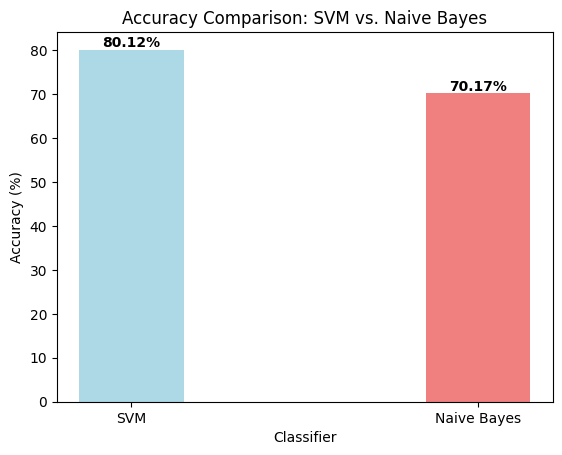

In [ ]:
import matplotlib.pyplot as plt

# Accuracy of Bernoulli Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_bernoulli) * 100

# Accuracy of Support Vector Machine
accuracy_svm = accuracy_score(y_test, y_pred_svc) * 100

# Create the bar graph
classifiers = ['SVM', 'Naive Bayes']
accuracy_data = [accuracy_svm, accuracy_nb]

# Decrease the width of the bars (adjust the value as needed)
bar_width = 0.3

plt.bar(classifiers, accuracy_data, color=['lightblue', 'lightcoral'], width=bar_width)

plt.title('Accuracy Comparison: SVM vs. Naive Bayes')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')

# Add accuracy values as text annotations on the bars
for i, acc in enumerate(accuracy_data):
    plt.text(i, acc, f'{acc:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.show()

---
####**Plot Graphs**
---

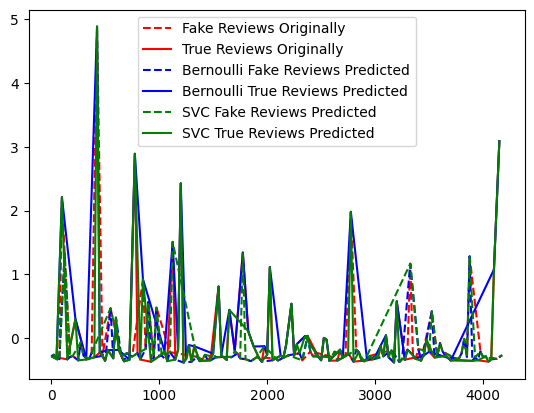

In [ ]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('/content/drive/MyDrive/Fake-Reviews-Detection-main/graph.py')
from graph import plot2d, plot_comp

# Assuming you have already defined X_train, X_test, y_train, y_test, y_pred_bernoulli, and y_pred_svc

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Create the 'result' directory if it doesn't exist
os.makedirs("result", exist_ok=True)

# Assuming plot2d and plot_comp functions take appropriate arguments.
# You may need to adjust the arguments based on your implementation.

plot2d(X_test, y_test, y_pred_bernoulli, y_pred_svc)


---
### **Tabular form**
---

In [ ]:
import pandas as pd
from tabulate import tabulate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


# Calculate the performance metrics
accuracy_nb = accuracy_score(y_test, y_pred_bernoulli) * 100
f1_score_nb = f1_score(y_test, y_pred_bernoulli) * 100
precision_nb = precision_score(y_test, y_pred_bernoulli) * 100
recall_nb = recall_score(y_test, y_pred_bernoulli) * 100

accuracy_svm = accuracy_score(y_test, y_pred_svc) * 100
f1_score_svm = f1_score(y_test, y_pred_svc) * 100
precision_svm = precision_score(y_test, y_pred_svc) * 100
recall_svm = recall_score(y_test, y_pred_svc) * 100

# Create DataFrame
data = {
    'Classifier': ['Bernoulli Naive Bayes', 'Support Vector Machine (SVM)'],
    'Accuracy': [accuracy_nb, accuracy_svm],
    'F1 Score': [f1_score_nb, f1_score_svm],
    'Precision': [precision_nb, precision_svm],
    'Recall': [recall_nb, recall_svm]
}

df = pd.DataFrame(data)

# Display the table
print(tabulate(df, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════════════════╤════════════╤════════════╤═════════════╤══════════╕
│    │ Classifier                   │   Accuracy │   F1 Score │   Precision │   Recall │
╞════╪══════════════════════════════╪════════════╪════════════╪═════════════╪══════════╡
│  0 │ Bernoulli Naive Bayes        │    70.1667 │    65.1654 │     76.6514 │  56.6731 │
├────┼──────────────────────────────┼────────────┼────────────┼─────────────┼──────────┤
│  1 │ Support Vector Machine (SVM) │    80.119  │    81.5061 │     75.1941 │  88.9749 │
╘════╧══════════════════════════════╧════════════╧════════════╧═════════════╧══════════╛


---
###**Run deploy.py file to Test on your own Inputs**
---

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Fake-Reviews-Detection-main')

!python /content/drive/MyDrive/Fake-Reviews-Detection-main/deploy.py


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!

Enter your Review : Everybody wants to fall for their promises. But this is a relatively unheard of brand, some even say a non existant company. Look at how amateur their labels and products are. You have to ask yourself if you would trust this kind of amateur stuff? No way! Don't waste your money.

---------------------------------------------------------------------------------------


En